In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [42]:
ubicacion = r"C:\Users\randy\EBAC.PRACTICAS\Wholesale customers data.csv"
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
from sklearn.preprocessing import normalize
data_scale = normalize(data)
data_scale

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, ...,
        1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, ...,
        1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, ...,
        1.50119124e-01, 2.19467293e-01, 4.89619296e-01],
       ...,
       [5.01633106e-05, 7.52449659e-05, 3.64461533e-01, ...,
        1.09606834e-02, 3.72236846e-01, 4.68274505e-02],
       [9.11309417e-05, 2.73392825e-04, 9.37737390e-01, ...,
        9.45939175e-02, 1.53099982e-02, 1.93653251e-01],
       [2.41225630e-04, 7.23676891e-04, 6.72295832e-01, ...,
        1.56796660e-02, 1.15064626e-01, 1.25437328e-02]])

In [44]:
data_scale = pd.DataFrame(data_scale, columns=data.columns)
data_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


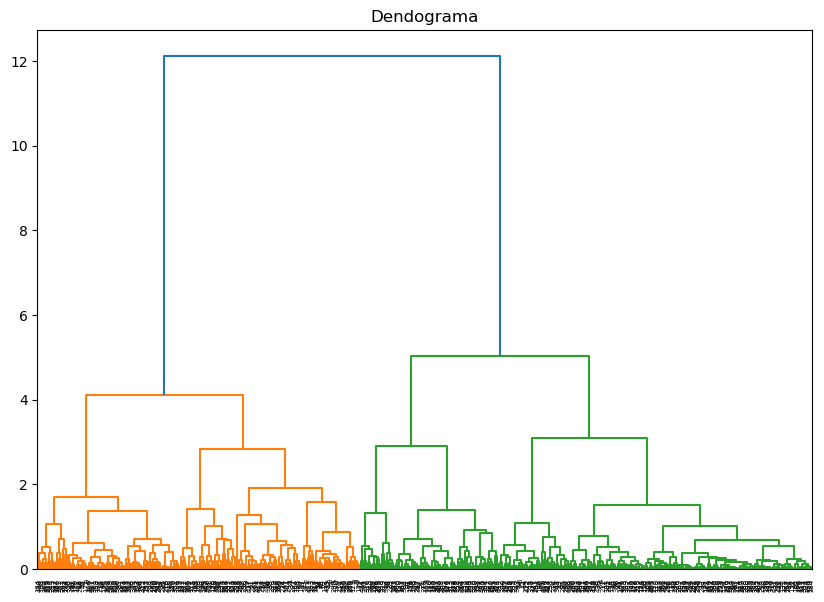

In [45]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(data_scale, method='ward'))

In [46]:
print(dend['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1

In [47]:
colores_unicos = set(dend['color_list'])
colores_unicos

{'C0', 'C1', 'C2'}

In [48]:
num_clusters_optimo = len(colores_unicos) - 1
num_clusters_optimo

2

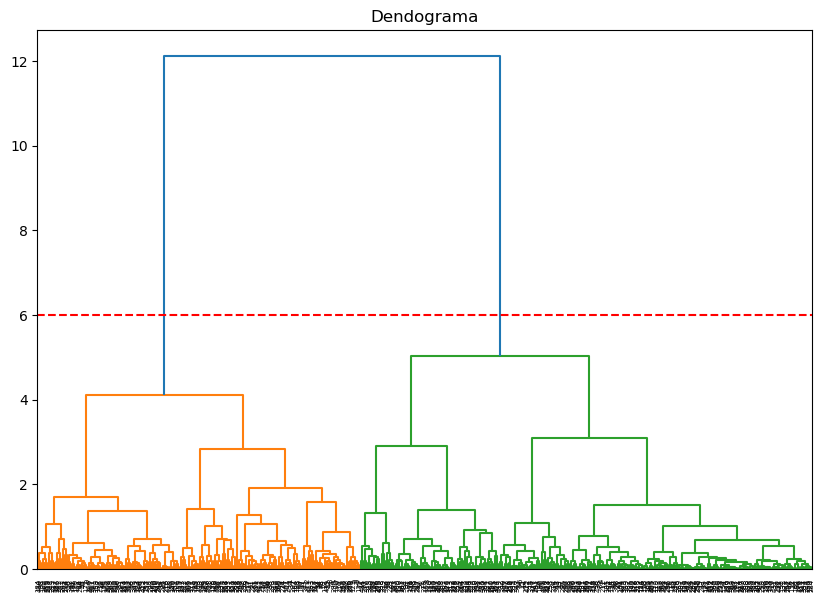

In [49]:
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(data_scale, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [50]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # n_clusters=2 sirve para dar valor de 2 a los clusters
# affinity: 'euclidean' es la distancia entre los puntos, linkage: 'ward' es el método de agrupamiento

grupos = cluster.fit_predict(data_scale)
grupos

c:\Users\randy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

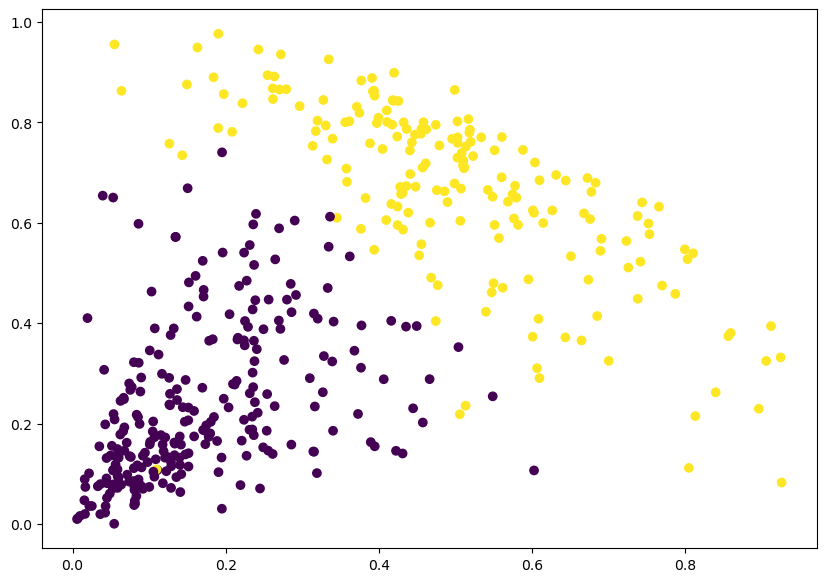

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(data_scale['Milk'], data_scale['Grocery'], c= cluster.labels_)

In [52]:
# Separacion de grupos mediante PCA
campos = data_scale.values
print(campos)

[[1.11821406e-04 1.67732109e-04 7.08332695e-01 ... 1.19648904e-02
  1.49505220e-01 7.48085205e-02]
 [1.25321880e-04 1.87982820e-04 4.42198253e-01 ... 1.10408576e-01
  2.06342475e-01 1.11285829e-01]
 [1.24839188e-04 1.87258782e-04 3.96551681e-01 ... 1.50119124e-01
  2.19467293e-01 4.89619296e-01]
 ...
 [5.01633106e-05 7.52449659e-05 3.64461533e-01 ... 1.09606834e-02
  3.72236846e-01 4.68274505e-02]
 [9.11309417e-05 2.73392825e-04 9.37737390e-01 ... 9.45939175e-02
  1.53099982e-02 1.93653251e-01]
 [2.41225630e-04 7.23676891e-04 6.72295832e-01 ... 1.56796660e-02
  1.15064626e-01 1.25437328e-02]]


In [53]:
from sklearn import decomposition # Descomposicion de datos
# from sklearn.decomposition import PCA # PCA: Analisis de componentes principales
pca = decomposition.PCA(n_components=2) # n_components=2 es el número de componentes principales que se desean obtener
pca.fit(campos)
campos = pca.transform(campos)
campos

array([[ 3.40370496e-02, -1.80420878e-01],
       [ 3.51057368e-01, -4.66441613e-02],
       [ 3.05375430e-01,  5.55510662e-02],
       [-3.83677396e-01,  1.61789121e-01],
       [-3.18591263e-01, -7.69700156e-02],
       [ 3.73478459e-02, -1.19851588e-01],
       [-1.20176243e-01, -2.43275779e-01],
       [ 2.39772413e-01, -1.04149634e-01],
       [ 1.65698845e-01, -1.87946102e-01],
       [ 5.68883753e-01, -1.09187885e-01],
       [ 5.50490278e-01,  8.66514506e-02],
       [-3.80404330e-01, -1.63301699e-01],
       [-2.16997115e-01, -2.19645753e-01],
       [-4.15793549e-02, -1.73397544e-01],
       [-1.33933983e-01, -2.36377213e-01],
       [-3.35298752e-01, -2.30915370e-01],
       [ 7.26283916e-01, -7.33583822e-02],
       [ 5.14896222e-02,  7.05034152e-03],
       [-1.39371504e-01, -1.51057486e-01],
       [ 1.64608998e-01, -2.12412480e-01],
       [-3.33835807e-01, -1.80358027e-01],
       [-3.23995148e-01,  2.39147842e-01],
       [-4.98705749e-01,  4.14682390e-02],
       [ 2.

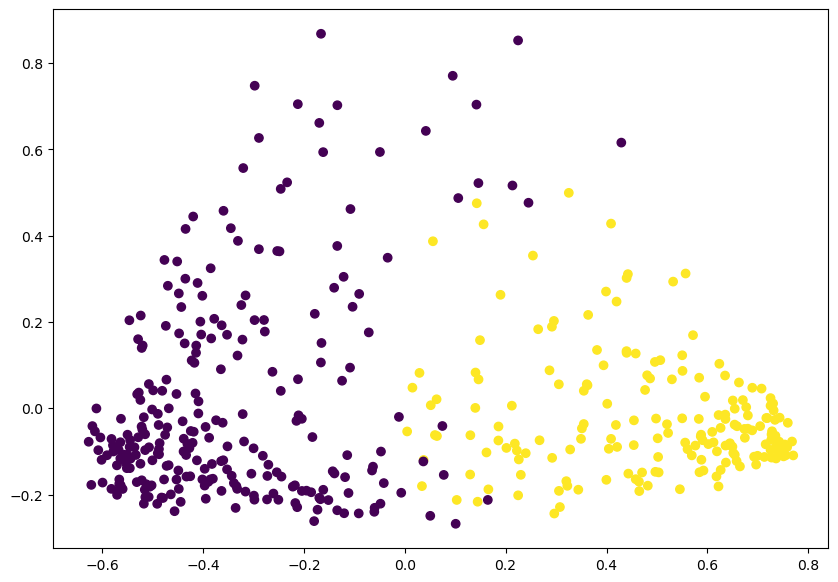

In [54]:
plt.figure(figsize=(10,7))
plt.scatter(campos[:,0], campos[:,1], c = cluster.labels_)

In [ ]:
dataframe = pd.DataFrame(grupos, columns=['Grupo']) # esto sirve para crear un nuevo dataframe con los grupos
dataframe

,Grupo
0,1
1,1
2,1
3,0
4,0
...,...
435,0
436,0
437,1
438,0


In [56]:
dataframe2 = pd.concat([data, dataframe], axis=1, join = 'inner') # esto sirve para concatenar el dataframe original con el nuevo dataframe de grupos
dataframe2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Grupo
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


In [58]:
pd.options.display.max_rows = None
dataframe2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Grupo
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,0
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,1


# Analisis del caso de Estudiantes

In [60]:
data = pd.DataFrame(np.array([[7, 6.5, 9.2, 8.6, 8],
                              [7.5, 9.4, 7.3, 7, 7],
                              [7.6, 9.2, 8, 8, 7.5],
                              [5, 6.5, 6.5, 7, 9],
                              [6, 6, 7.8, 8.9, 7.3],
                              [7.8, 9.6, 7.7, 8, 6.5],
                              [6.3, 6.4, 8.2, 9, 7.2],
                              [7.9, 9.7, 7.5, 8, 6],
                              [6, 6, 6.5, 5.5, 8.7],
                              [6.8, 7.2, 8.7, 9, 7]]),
                    columns=['Matematicas', 'Ciencias', 'Español', 'Historia', 'EdFisica'])
data

,Matematicas,Ciencias,Español,Historia,EdFisica
0,7.0,6.5,9.2,8.6,8.0
1,7.5,9.4,7.3,7.0,7.0
2,7.6,9.2,8.0,8.0,7.5
3,5.0,6.5,6.5,7.0,9.0
4,6.0,6.0,7.8,8.9,7.3
5,7.8,9.6,7.7,8.0,6.5
6,6.3,6.4,8.2,9.0,7.2
7,7.9,9.7,7.5,8.0,6.0
8,6.0,6.0,6.5,5.5,8.7
9,6.8,7.2,8.7,9.0,7.0


In [62]:
# hacemos la normalizacion de datos para obtener datos escalados
from sklearn.preprocessing import normalize
data_scale = normalize(data)
data_scale

array([[0.39512724, 0.36690387, 0.51931009, 0.48544204, 0.45157399],
       [0.4360023 , 0.54645622, 0.42437557, 0.40693548, 0.40693548],
       [0.42050606, 0.50903365, 0.44263796, 0.44263796, 0.41497309],
       [0.32308533, 0.42001094, 0.42001094, 0.45231947, 0.5815536 ],
       [0.36834085, 0.36834085, 0.47884311, 0.54637226, 0.44814804],
       [0.43703137, 0.53788477, 0.43142841, 0.44823731, 0.36419281],
       [0.37600718, 0.38197555, 0.48940617, 0.53715311, 0.42972249],
       [0.44671284, 0.54849551, 0.42409446, 0.45236743, 0.33927557],
       [0.40434535, 0.40434535, 0.4380408 , 0.37064991, 0.58630076],
       [0.39015437, 0.41310462, 0.49916809, 0.51638078, 0.4016295 ]])

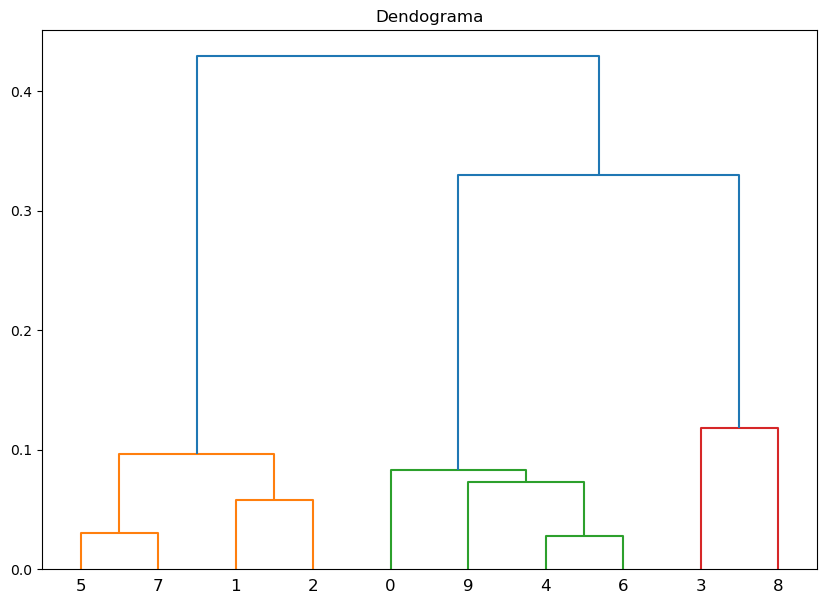

In [ ]:
# Acto seguido hacemos la aplicacion del metodo CLUSTERING JERARQUICO a nuestros datos escalados
# Con la finalidad de detectar el numero de clustering o grupos a menejar
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(data_scale, method='ward'))

In [ ]:
# Con este codigo establecemos la longitud de colores unicos menos 1 para saber cuantos grupos tenemos
colores_unicos = set(dend['color_list'])
num_cluster_optimo = len(colores_unicos) -1
num_cluster_optimo

3

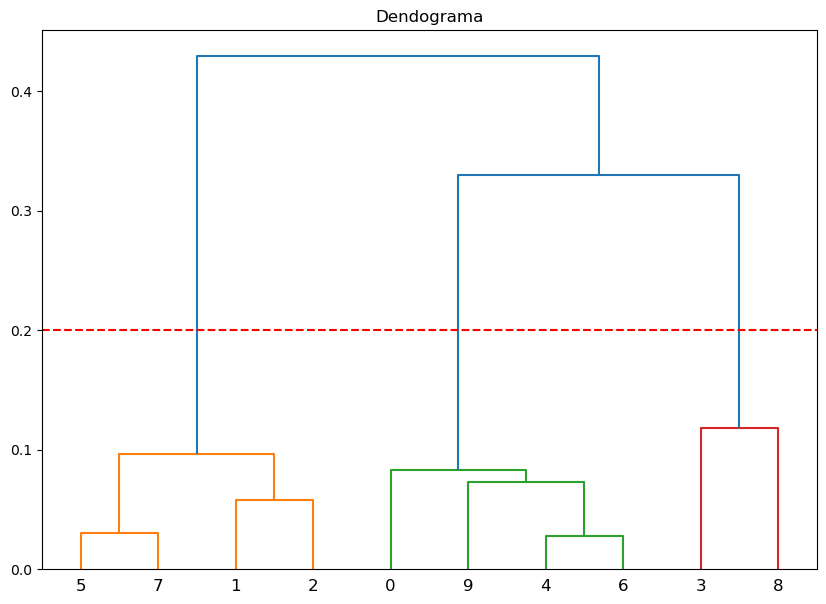

In [68]:
# Hacemos nuestra linealizacion de los clusters, en este caso 2
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(data_scale, method='ward'))
plt.axhline(y=0.2, color='r', linestyle='--')

In [71]:
# Analisis grafico con PCA
campos = data_scale
from sklearn import decomposition # Descomposicion de datos
# from sklearn.decomposition import PCA # PCA: Analisis de componentes principales
pca = decomposition.PCA(n_components=2) # n_components=2 es el número de componentes principales que se desean obtener
pca.fit(campos)
campos = pca.transform(campos)
campos

array([[-0.07537384, -0.05649076],
       [ 0.11233306,  0.06156361],
       [ 0.06937082,  0.02395785],
       [-0.12493186,  0.09133353],
       [-0.08285196, -0.08431667],
       [ 0.12725973,  0.00431553],
       [-0.05987387, -0.08818057],
       [ 0.15385473, -0.00668172],
       [-0.1045932 ,  0.13852098],
       [-0.01519363, -0.08402179]])

In [72]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') # n_clusters=2 sirve para dar valor de 2 a los clusters
# affinity: 'euclidean' es la distancia entre los puntos, linkage: 'ward' es el método de agrupamiento

grupos = cluster.fit_predict(data_scale)
grupos

c:\Users\randy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 1, 1, 0, 2, 1, 2, 1, 0, 2], dtype=int64)

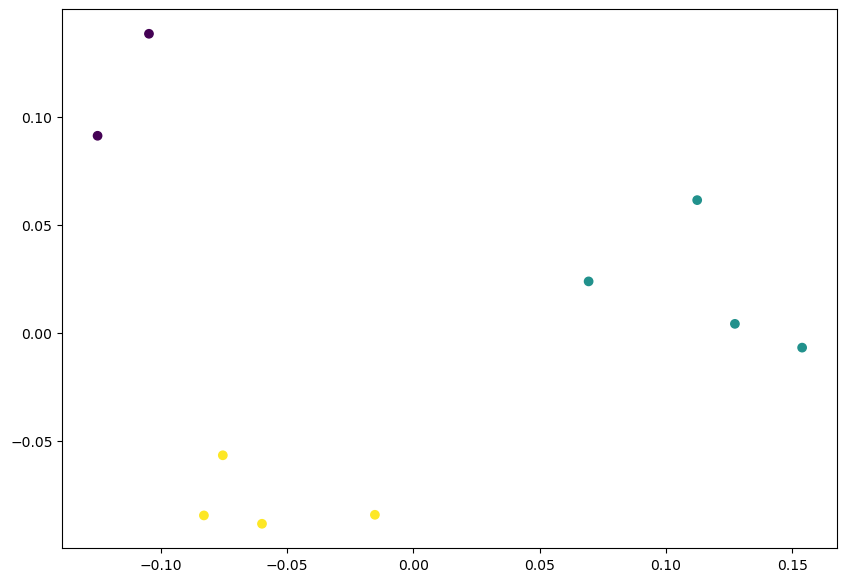

In [74]:
plt.figure(figsize=(10,7))
plt.scatter(campos[:,0], campos[:,1], c= cluster.labels_)

In [75]:
dataframe = pd.DataFrame(grupos, columns=['grupos'])
dataframe

,grupos
0,2
1,1
2,1
3,0
4,2
5,1
6,2
7,1
8,0
9,2


In [77]:
dataframe2 = pd.concat([data, dataframe], axis=1, join = 'inner') # esto sirve para concatenar el dataframe original con el nuevo dataframe de grupos
dataframe2

,Matematicas,Ciencias,Español,Historia,EdFisica,grupos
0,7.0,6.5,9.2,8.6,8.0,2
1,7.5,9.4,7.3,7.0,7.0,1
2,7.6,9.2,8.0,8.0,7.5,1
3,5.0,6.5,6.5,7.0,9.0,0
4,6.0,6.0,7.8,8.9,7.3,2
5,7.8,9.6,7.7,8.0,6.5,1
6,6.3,6.4,8.2,9.0,7.2,2
7,7.9,9.7,7.5,8.0,6.0,1
8,6.0,6.0,6.5,5.5,8.7,0
9,6.8,7.2,8.7,9.0,7.0,2


In [79]:
dataframe2.index = ['Lucia', 'Pedro', 'Ines', 'Luis', 'Andres', 'Ana', 'Carlos', 'Jose', 'Sonia', 'Maria']
dataframe2

,Matematicas,Ciencias,Español,Historia,EdFisica,grupos
Lucia,7.0,6.5,9.2,8.6,8.0,2
Pedro,7.5,9.4,7.3,7.0,7.0,1
Ines,7.6,9.2,8.0,8.0,7.5,1
Luis,5.0,6.5,6.5,7.0,9.0,0
Andres,6.0,6.0,7.8,8.9,7.3,2
Ana,7.8,9.6,7.7,8.0,6.5,1
Carlos,6.3,6.4,8.2,9.0,7.2,2
Jose,7.9,9.7,7.5,8.0,6.0,1
Sonia,6.0,6.0,6.5,5.5,8.7,0
Maria,6.8,7.2,8.7,9.0,7.0,2
